# Some parameters must be specified before the calculation starts. Without losing generality, the payoff matrix of RSP game can be written as 
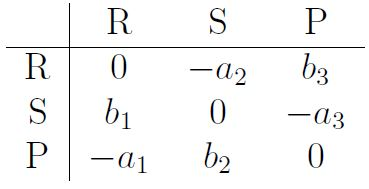

# So we should determine parameters a_i and b_i.

# Also beta parameter in fermi function shuold be assign.




In [39]:
# N is the size of population
#RP is the number of realization for averaging fixation probabilities
#RT is the number of realization for averaging fixation times

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math

N=50

RP=1000
RT=3000



b1=2
b2=2
b3=2
a1=1
a2=1
a3=1

beta=.001


def pof(N,w1,w2):
    return((-a2*w2+b3*(N-w1-w2))/N,(b1*w1-a3*(N-w1-w2))/N,(-a1*w1+b2*w2)/N)


def fermi(x,y):
    return(1/(1+math.exp(beta*(x-y))))


In [40]:
def fix(N,w1,w2):
    t=0
    while   w1+w2>0 and N-w2>0 and N-w1>0 :

        p=random.random()

        h1=((N-w1-w2)*(w1)*fermi(pof(N,w1,w2)[0],pof(N,w1,w2)[2]))/(N**2-N)
        h2=((N-w1-w2)*(w1)*fermi(pof(N,w1,w2)[2],pof(N,w1,w2)[0]))/(N**2-N)
        h3=((N-w1-w2)*(w2)*fermi(pof(N,w1,w2)[1],pof(N,w1,w2)[2]))/(N**2-N)
        h4=((N-w1-w2)*(w2)*fermi(pof(N,w1,w2)[2],pof(N,w1,w2)[1]))/(N**2-N)
        h5=((w1)*(w2)*fermi(pof(N,w1,w2)[1],pof(N,w1,w2)[0]))/(N**2-N)
        h6=((w1)*(w2)*fermi(pof(N,w1,w2)[0],pof(N,w1,w2)[1]))/(N**2-N)
        h7=((w1)*(w1-1)+(w2)*(w2-1)+(N-w1-w2)*(N-w1-w2-1))/(2*(N**2-N))

        if 0<p<2*h1:
            w1=w1-1
        elif 2*h1<p<2*(h1+h2):
            w1=w1+1
        elif 2*(h1+h2)<p<2*(h1+h2+h3):
            w2=w2-1
        elif 2*(h1+h2+h3)<p<2*(h1+h2+h3+h4):
            w2=w2+1
        elif 2*(h1+h2+h3+h4)<p<2*(h1+h2+h3+h4+h5):
            w1=w1+1
            w2=w2-1
        elif 2*(h1+h2+h3+h4+h5)<p<2*(h1+h2+h3+h4+h5+h6):
            w1=w1-1
            w2=w2+1

        t=t+1
    return(w1,w2,N-w1-w2,t)


In [ ]:
# fixation probability of strategy P

def meyp(N,w1,w2,te):
    p=0
    u=0
    g=0
    
    for x in range (0,te):
        az=(fix(N,w1,w2))
        if  (az[0])==N: #R
            p=p+1
        elif (az[1])==N:#S
            u=u+1
        elif (az[2])==N:#P
            g=g+1
    return(p/te,u/te,g/te ) 






SE=[]
SE1=[]
SE2=[]

for x in range (0,N+1):
    for y in range (0,x+1):
        K=meyp(N,y,N-x,RP)
        SE.append(K[2])
        SE1.append(K[1])
        SE2.append(K[0])
        

        

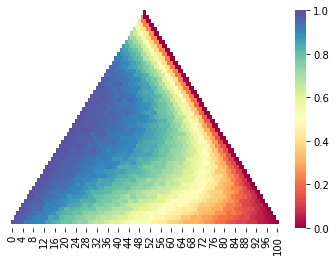

In [8]:
SEE=np.zeros(len(SE))
SEE[0]=SE[0]
SEE[1]=SE[int(N*(N+1)/2)]
SEE[2]=SE[int((N+2)*(N+1)/2)-1]
for x in range (1,int(N*(N+1)/2)-1):
    SEE[x+2]=SE[x]
for x in range (int(N*(N+1)/2)+1,int((N+2)*(N+1)/2)-1):
    SEE[x+1]=SE[x]   




#pro

PROz=SEE
def rey(x):
    if x==1:
        return([PROz[0]])
    if x==N+1:
        GH=[PROz[1]]
        for s in range (int(x*(x-1)//2+2),len(PROz)):
            GH.append(PROz[s])
        GH.append(PROz[2])
        return(GH)
        
    ui=[]
    for j in range (int(x*(x+1)//2-x+2),int(x*(x+1)//2+2)):
        ui.append(PROz[j])
    return(ui)


ER=np.zeros((N+2,2*N+1))
for i in range (0,N+2):
    for j in range (0,2*N+1):
        ER[i][j]='nan'
for j in range (1,N+2):
    for k in range (0, len(rey(j))):
        ER[j-1][N-len(rey(j))+2*k+1]=rey(j)[k]
        
        


        
for x in range (0,N+1):
    for y in range (0,2*N-1):
        if str(ER[x,y])=='nan' and str(ER[x,y-1])!='nan' and str(ER[x,y+1])!='nan':
            ER[x,y]=ER[x,y+1]
ER[N][2*N-1]=ER[N][2*N]            
 
ax = sns.heatmap(ER,yticklabels=False,cmap='Spectral')    


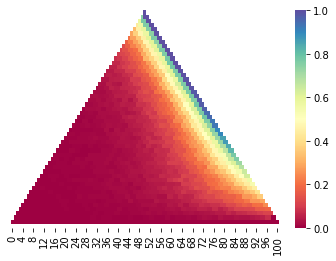

In [9]:
# fixation probability of strategy S


SEE=np.zeros(len(SE1))
SEE[0]=SE1[0]
SEE[1]=SE1[int(N*(N+1)/2)]
SEE[2]=SE1[int((N+2)*(N+1)/2)-1]
for x in range (1,int(N*(N+1)/2)-1):
    SEE[x+2]=SE1[x]
for x in range (int(N*(N+1)/2)+1,int((N+2)*(N+1)/2)-1):
    SEE[x+1]=SE1[x]   




#pro

PROz=SEE
def rey(x):
    if x==1:
        return([PROz[0]])
    if x==N+1:
        GH=[PROz[1]]
        for s in range (int(x*(x-1)//2+2),len(PROz)):
            GH.append(PROz[s])
        GH.append(PROz[2])
        return(GH)
        
    ui=[]
    for j in range (int(x*(x+1)//2-x+2),int(x*(x+1)//2+2)):
        ui.append(PROz[j])
    return(ui)


ER=np.zeros((N+2,2*N+1))
for i in range (0,N+2):
    for j in range (0,2*N+1):
        ER[i][j]='nan'
for j in range (1,N+2):
    for k in range (0, len(rey(j))):
        ER[j-1][N-len(rey(j))+2*k+1]=rey(j)[k]
        
        


        
for x in range (0,N+1):
    for y in range (0,2*N-1):
        if str(ER[x,y])=='nan' and str(ER[x,y-1])!='nan' and str(ER[x,y+1])!='nan':
            ER[x,y]=ER[x,y+1]
ER[N][2*N-1]=ER[N][2*N]            
            

)

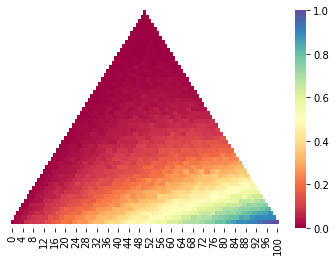

In [10]:
# fixation probability of strategy R


SEE=np.zeros(len(SE2))
SEE[0]=SE2[0]
SEE[1]=SE2[int(N*(N+1)/2)]
SEE[2]=SE2[int((N+2)*(N+1)/2)-1]
for x in range (1,int(N*(N+1)/2)-1):
    SEE[x+2]=SE2[x]
for x in range (int(N*(N+1)/2)+1,int((N+2)*(N+1)/2)-1):
    SEE[x+1]=SE2[x]   




#pro

PROz=SEE
def rey(x):
    if x==1:
        return([PROz[0]])
    if x==N+1:
        GH=[PROz[1]]
        for s in range (int(x*(x-1)//2+2),len(PROz)):
            GH.append(PROz[s])
        GH.append(PROz[2])
        return(GH)
        
    ui=[]
    for j in range (int(x*(x+1)//2-x+2),int(x*(x+1)//2+2)):
        ui.append(PROz[j])
    return(ui)


ER=np.zeros((N+2,2*N+1))
for i in range (0,N+2):
    for j in range (0,2*N+1):
        ER[i][j]='nan'
for j in range (1,N+2):
    for k in range (0, len(rey(j))):
        ER[j-1][N-len(rey(j))+2*k+1]=rey(j)[k]
        
        


        
for x in range (0,N+1):
    for y in range (0,2*N-1):
        if str(ER[x,y])=='nan' and str(ER[x,y-1])!='nan' and str(ER[x,y+1])!='nan':
            ER[x,y]=ER[x,y+1]
ER[N][2*N-1]=ER[N][2*N] 
ER[N-1][2*N-2]=ER[N-1][2*N-3]
ER[N-1][2*N-1]=ER[N-1][2*N-2]            

ax = sns.heatmap(ER,yticklabels=False,cmap='Spectral')


# Fixation Times

In [ ]:
# fixation time of strategy P

def meytg(N,w1,w2,te):
    if N-w1-w2==0:
        return('nan','nan','nan')
    if w1+w2==0:
        return(1,0,0)
    
    if w2==0:
        return('nan','nan','nan')
    if w2==N:
        return(0,1,0)
    
    
    if w1==0:
        return('nan','nan','nan')
    if w1==N:
        return(0,0,1)
     
    ttp=0
    p=0
    tts=0
    s=0
    ttr=0
    r=0
    while p+s+r<te:
        az=fix(N,w1,w2)
        if (az[2])==N:
            ttp=ttp+az[3]
            p=p+1
        if (az[1])==N:
            tts=tts+az[3]
            s=s+1
        if (az[0])==N:
            ttr=ttr+az[3]
            r=r+1

    return([ttp/p,tts/s,ttr/r])  

#time
TP=[]
TS=[]
TR=[]

for x in range (0,N+1):
    for y in range (0,x+1):
        K=meytg(N,y,N-x,RT)
        TP.append(K[0])
        TS.append(K[1])
        TR.append(K[2])


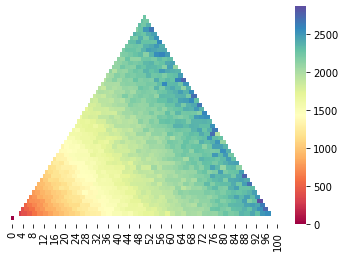

In [43]:




TII=np.zeros(len(TP))
TII[0]=TP[0]
TII[1]=TP[int(N*(N+1)/2)]
TII[2]=TP[int((N+2)*(N+1)/2)-1]
for x in range (1,int(N*(N+1)/2)-1):
    TII[x+2]=TP[x]
for x in range (int(N*(N+1)/2)+1,int((N+2)*(N+1)/2)-1):
    TII[x+1]=TP[x]  










#time

JKL=TII
def reyt(x):
    if x==1:
        return([JKL[0]])
    if x==N+1:
        GH=[JKL[1]]
        for s in range (int(x*(x-1)//2+2),len(JKL)):
            GH.append(JKL[s])
        GH.append(JKL[2])
        return(GH)
        
    ui=[]
    for j in range (int(x*(x+1)//2-x+2),int(x*(x+1)//2+2)):
        ui.append(JKL[j])
    return(ui)


ERt=np.zeros((N+2,2*N+1))
for i in range (0,N+2):
    for j in range (0,2*N+1):
        ERt[i][j]='nan'
for j in range (1,N+2):
    for k in range (0, len(reyt(j))):
        ERt[j-1][N-len(reyt(j))+2*k+1]=reyt(j)[k]
        
        


        
for x in range (0,N+1):
    for y in range (0,2*N-1):
        if str(ERt[x,y])=='nan' and str(ERt[x,y-1])!='nan' and str(ERt[x,y+1])!='nan':
            ERt[x,y]=ERt[x,y+1]            
ERt[N][2*N-1]=ERt[N][2*N] 

for x in range (0,N+1):
    for y in range (0,2*N+1):
        if ERt[x,y]==0:
            ERt[x,y]='nan'
ERt[N][0]=0
ax = sns.heatmap(ERt,yticklabels=False,cmap='Spectral') 


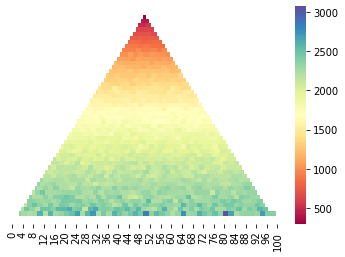

In [44]:
# fixation time of strategy S





TII=np.zeros(len(TS))
TII[0]=TS[0]
TII[1]=TS[int(N*(N+1)/2)]
TII[2]=TS[int((N+2)*(N+1)/2)-1]
for x in range (1,int(N*(N+1)/2)-1):
    TII[x+2]=TS[x]
for x in range (int(N*(N+1)/2)+1,int((N+2)*(N+1)/2)-1):
    TII[x+1]=TS[x]  










#time

JKL=TII
def reyt(x):
    if x==1:
        return([JKL[0]])
    if x==N+1:
        GH=[JKL[1]]
        for s in range (int(x*(x-1)//2+2),len(JKL)):
            GH.append(JKL[s])
        GH.append(JKL[2])
        return(GH)
        
    ui=[]
    for j in range (int(x*(x+1)//2-x+2),int(x*(x+1)//2+2)):
        ui.append(JKL[j])
    return(ui)


ERt=np.zeros((N+2,2*N+1))
for i in range (0,N+2):
    for j in range (0,2*N+1):
        ERt[i][j]='nan'
for j in range (1,N+2):
    for k in range (0, len(reyt(j))):
        ERt[j-1][N-len(reyt(j))+2*k+1]=reyt(j)[k]

        
for x in range (0,N+1):
    for y in range (0,2*N-1):
        if str(ERt[x,y])=='nan' and str(ERt[x,y-1])!='nan' and str(ERt[x,y+1])!='nan':
            ERt[x,y]=ERt[x,y+1]            
ERt[N][2*N-1]=ERt[N][2*N] 

for x in range (0,N+1):
    for y in range (0,2*N+1):
        if ERt[x,y]==0:
            ERt[x,y]='nan'
ERt[N-1][2*N-2]=ERt[N-1][2*N-3]
ERt[N-1][2*N-1]=ERt[N-1][2*N-2]
ERt[N][0]=np.nan
sns.heatmap(ERt,yticklabels=False,cmap='Spectral') 


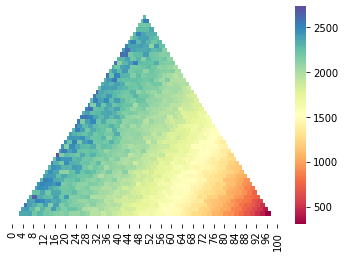

In [45]:
# fixation time of strategy R





TII=np.zeros(len(TR))
TII[0]=TR[0]
TII[1]=TR[int(N*(N+1)/2)]
TII[2]=TR[int((N+2)*(N+1)/2)-1]
for x in range (1,int(N*(N+1)/2)-1):
    TII[x+2]=TR[x]
for x in range (int(N*(N+1)/2)+1,int((N+2)*(N+1)/2)-1):
    TII[x+1]=TR[x]  






#time

JKL=TII
def reyt(x):
    if x==1:
        return([JKL[0]])
    if x==N+1:
        GH=[JKL[1]]
        for s in range (int(x*(x-1)//2+2),len(JKL)):
            GH.append(JKL[s])
        GH.append(JKL[2])
        return(GH)
        
    ui=[]
    for j in range (int(x*(x+1)//2-x+2),int(x*(x+1)//2+2)):
        ui.append(JKL[j])
    return(ui)


ERt=np.zeros((N+2,2*N+1))
for i in range (0,N+2):
    for j in range (0,2*N+1):
        ERt[i][j]='nan'
for j in range (1,N+2):
    for k in range (0, len(reyt(j))):
        ERt[j-1][N-len(reyt(j))+2*k+1]=reyt(j)[k]

        
for x in range (0,N+1):
    for y in range (0,2*N-1):
        if str(ERt[x,y])=='nan' and str(ERt[x,y-1])!='nan' and str(ERt[x,y+1])!='nan':
            ERt[x,y]=ERt[x,y+1]            
ERt[N][2*N-1]=ERt[N][2*N] 

for x in range (0,N+1):
    for y in range (0,2*N+1):
        if ERt[x,y]==0:
            ERt[x,y]='nan'
ERt[N-1][2*N-2]=ERt[N-1][2*N-3]
ERt[N-1][2*N-1]=ERt[N-1][2*N-2]

ERt[N-1][2*N-1]=np.nan
ERt[N-1][2*N-2]=np.nan


sns.heatmap(ERt,yticklabels=False,cmap='Spectral') 
